In [1]:
'''
Here, we are looking at Iowa property sales data and are trying to predict sales price given 
a number of key attributes about the price: number of beds, property zone, garage size, etc.
We have two datasets: training and testing.  Our goal is the minimize our model's prediction
error through a linear regression evalution metric called Root-Mean-Squared-Error (RMSE).
First, I will clean the data.
Then, I will find key drivers of the target variable, Sales Price.
Next, I will prepare the relevant data for building the linear regression model through 1hot
Finally, I will build the linear regression machine learning model.

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation
'''

"\nHere, we are looking at Iowa property sales data and are trying to predict sales price given \na number of key attributes about the price: number of beds, property zone, garage size, etc.\nWe have two datasets: training and testing.  Our goal is the minimize our model's prediction\nerror through a linear regression evalution metric called Root-Mean-Squared-Error (RMSE).\nFirst, I will clean the data.\nThen, I will find key drivers of the target variable, Sales Price.\nNext, I will prepare the relevant data for building the linear regression model through 1hot\nFinally, I will build the linear regression machine learning model.\n\nLink: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation\n"

In [2]:
test_path = '/Users/asharifi/Desktop/Kaggle Project - House Prices/house-prices-advanced-regression-techniques/test.csv'
train_path = '/Users/asharifi/Desktop/Kaggle Project - House Prices/house-prices-advanced-regression-techniques/train.csv'
answers_path = '/Users/asharifi/Desktop/Kaggle Project - House Prices/house-prices-advanced-regression-techniques/sample_submission.csv'

In [3]:
import pandas as pd 

In [4]:
test_data = pd.read_csv(test_path)
train_data = pd.read_csv(train_path)
answers_data = pd.read_csv(answers_path)

In [5]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
answers_data.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [7]:
#add Sales price column to the test_data
test_data['SalePrice'] = answers_data['SalePrice']

In [8]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [9]:
#merge test and train data into one dataset 
data = pd.concat([train_data, test_data])

In [10]:
#all of the data in one place
#makes it a bit easier to clean and rand split for training and testing
data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1449,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137402.569856
1450,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,165086.775062
1451,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,188506.431412
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,172917.456816
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,166274.325226
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,187741.866657


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [12]:
#let's pivot a bit and learn about the data we are using
#but first we need some help from some libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot, image
import scipy

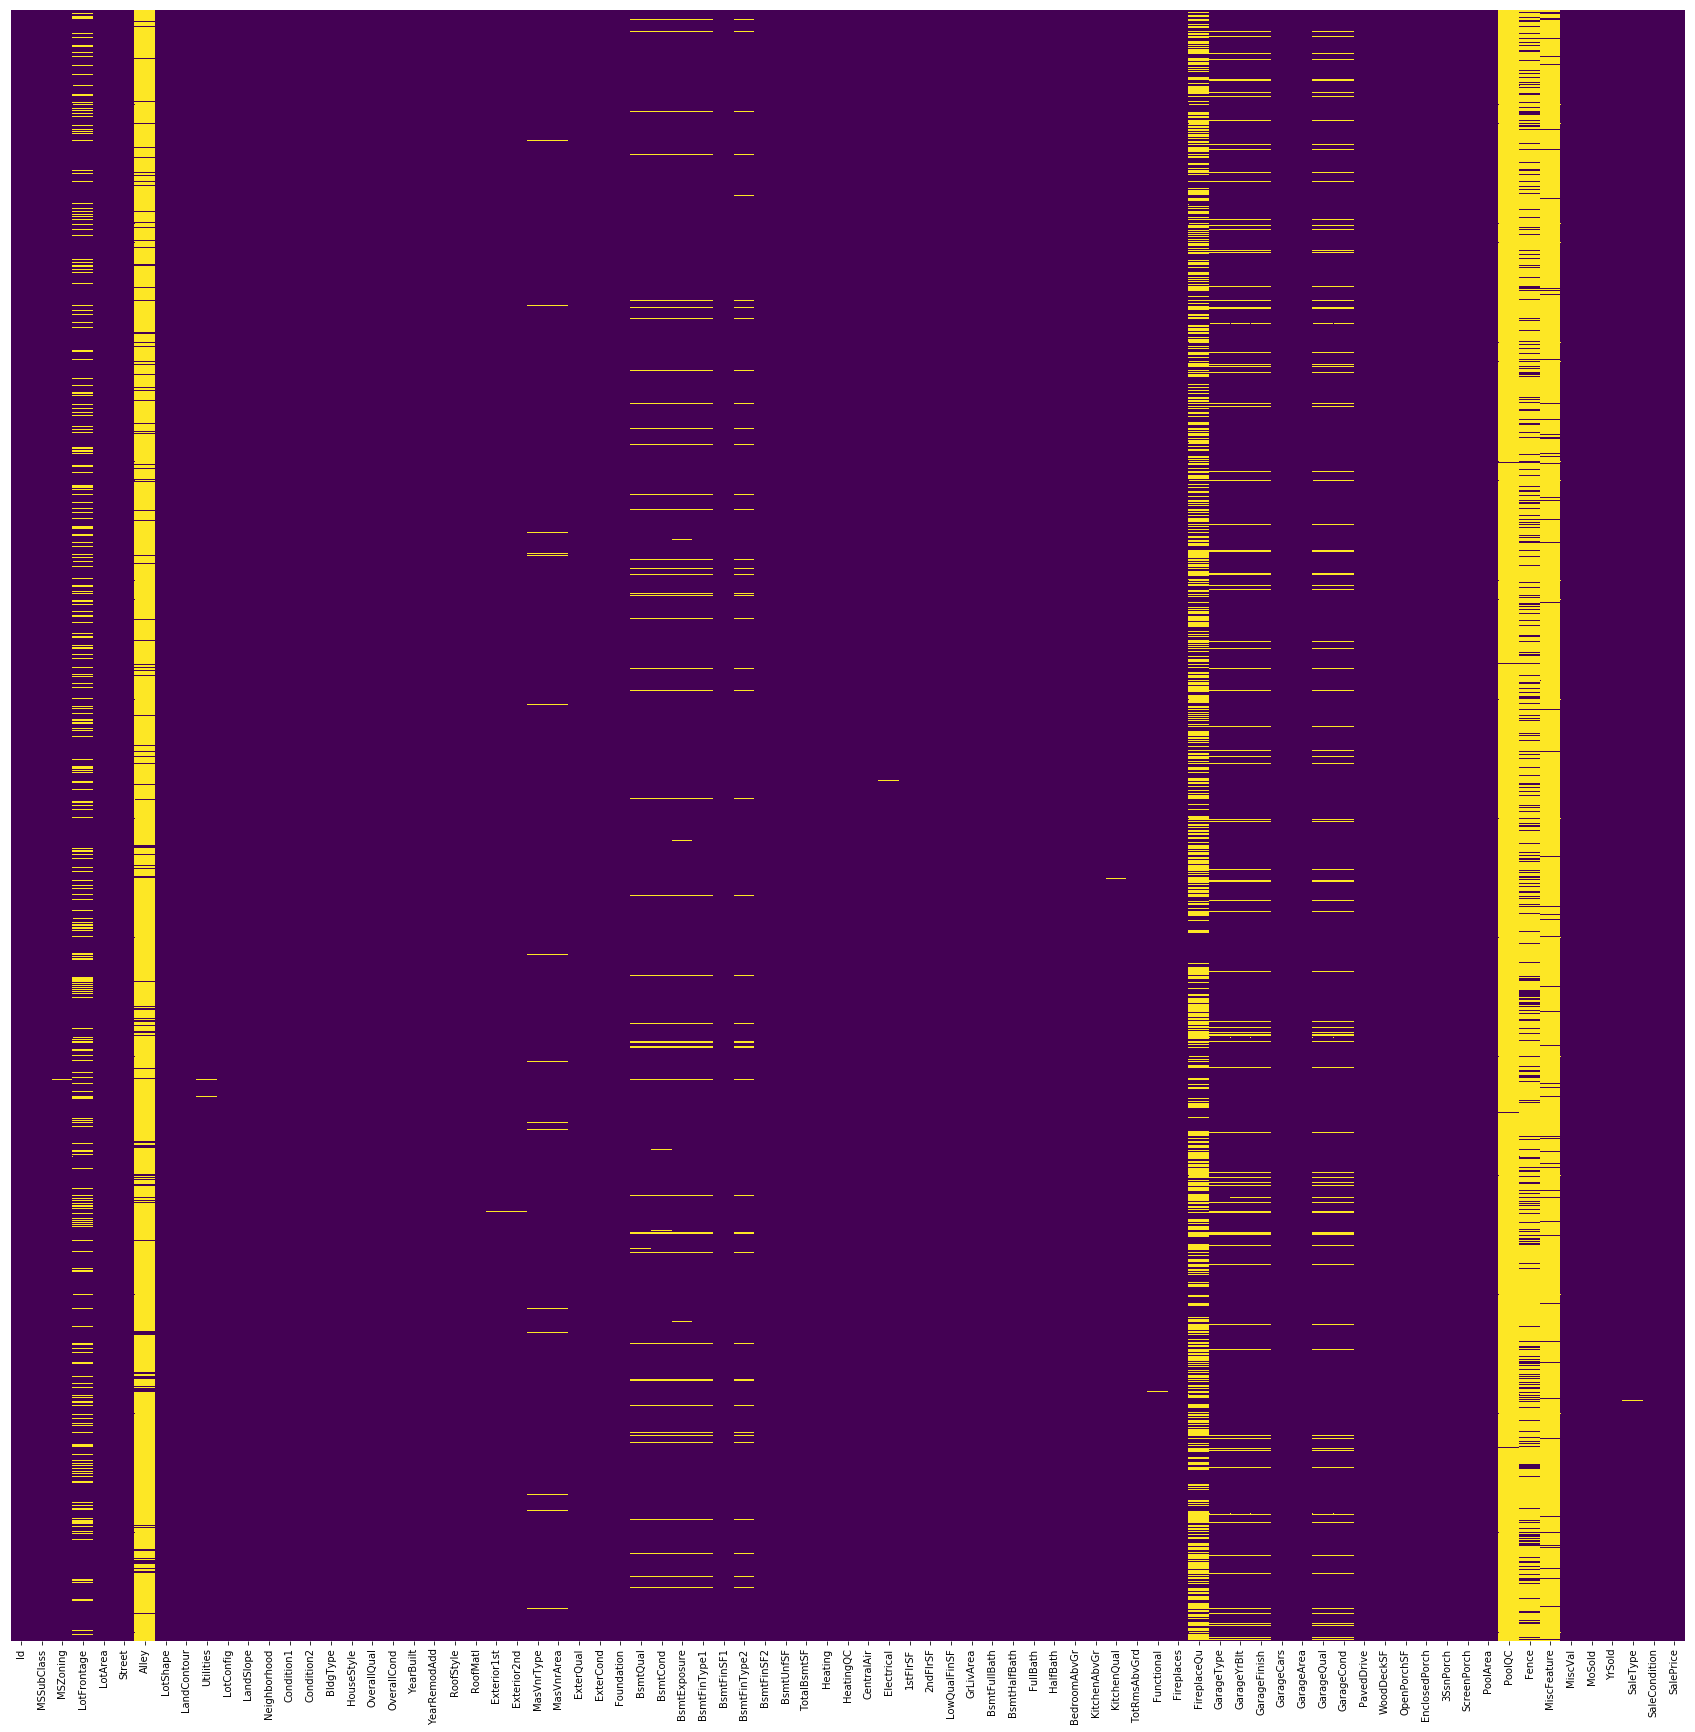

In [13]:
fig = plt.figure(figsize = (30,30), clear = True)
#fig = plt.subplot(151)
#fig = plt.figure(clear = True)
#plt.gca().invert_xaxis()
ax = sns.heatmap(data.isnull(), xticklabels=True, yticklabels=False,
                 cbar = False, cmap = 'viridis', linecolor = 'b')



In [14]:
#drop columns with too many missing values
ids = data.drop(['Id'], axis=1)
data = data.drop(['Alley', 'FireplaceQu', 'PoolQC',
                              'Fence', 'MiscFeature'], axis=1)

In [15]:
#fill null values with most prevelant attribute value
data.fillna(method = 'bfill', inplace=True)

In [16]:
#1hot encoding: converting categorical values to binary arrays for fitting the model
data_object_list = ['MSZoning', 'Street', 'LotShape',  
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
        'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
data_1hot = pd.get_dummies(data = data, columns=data_object_list)

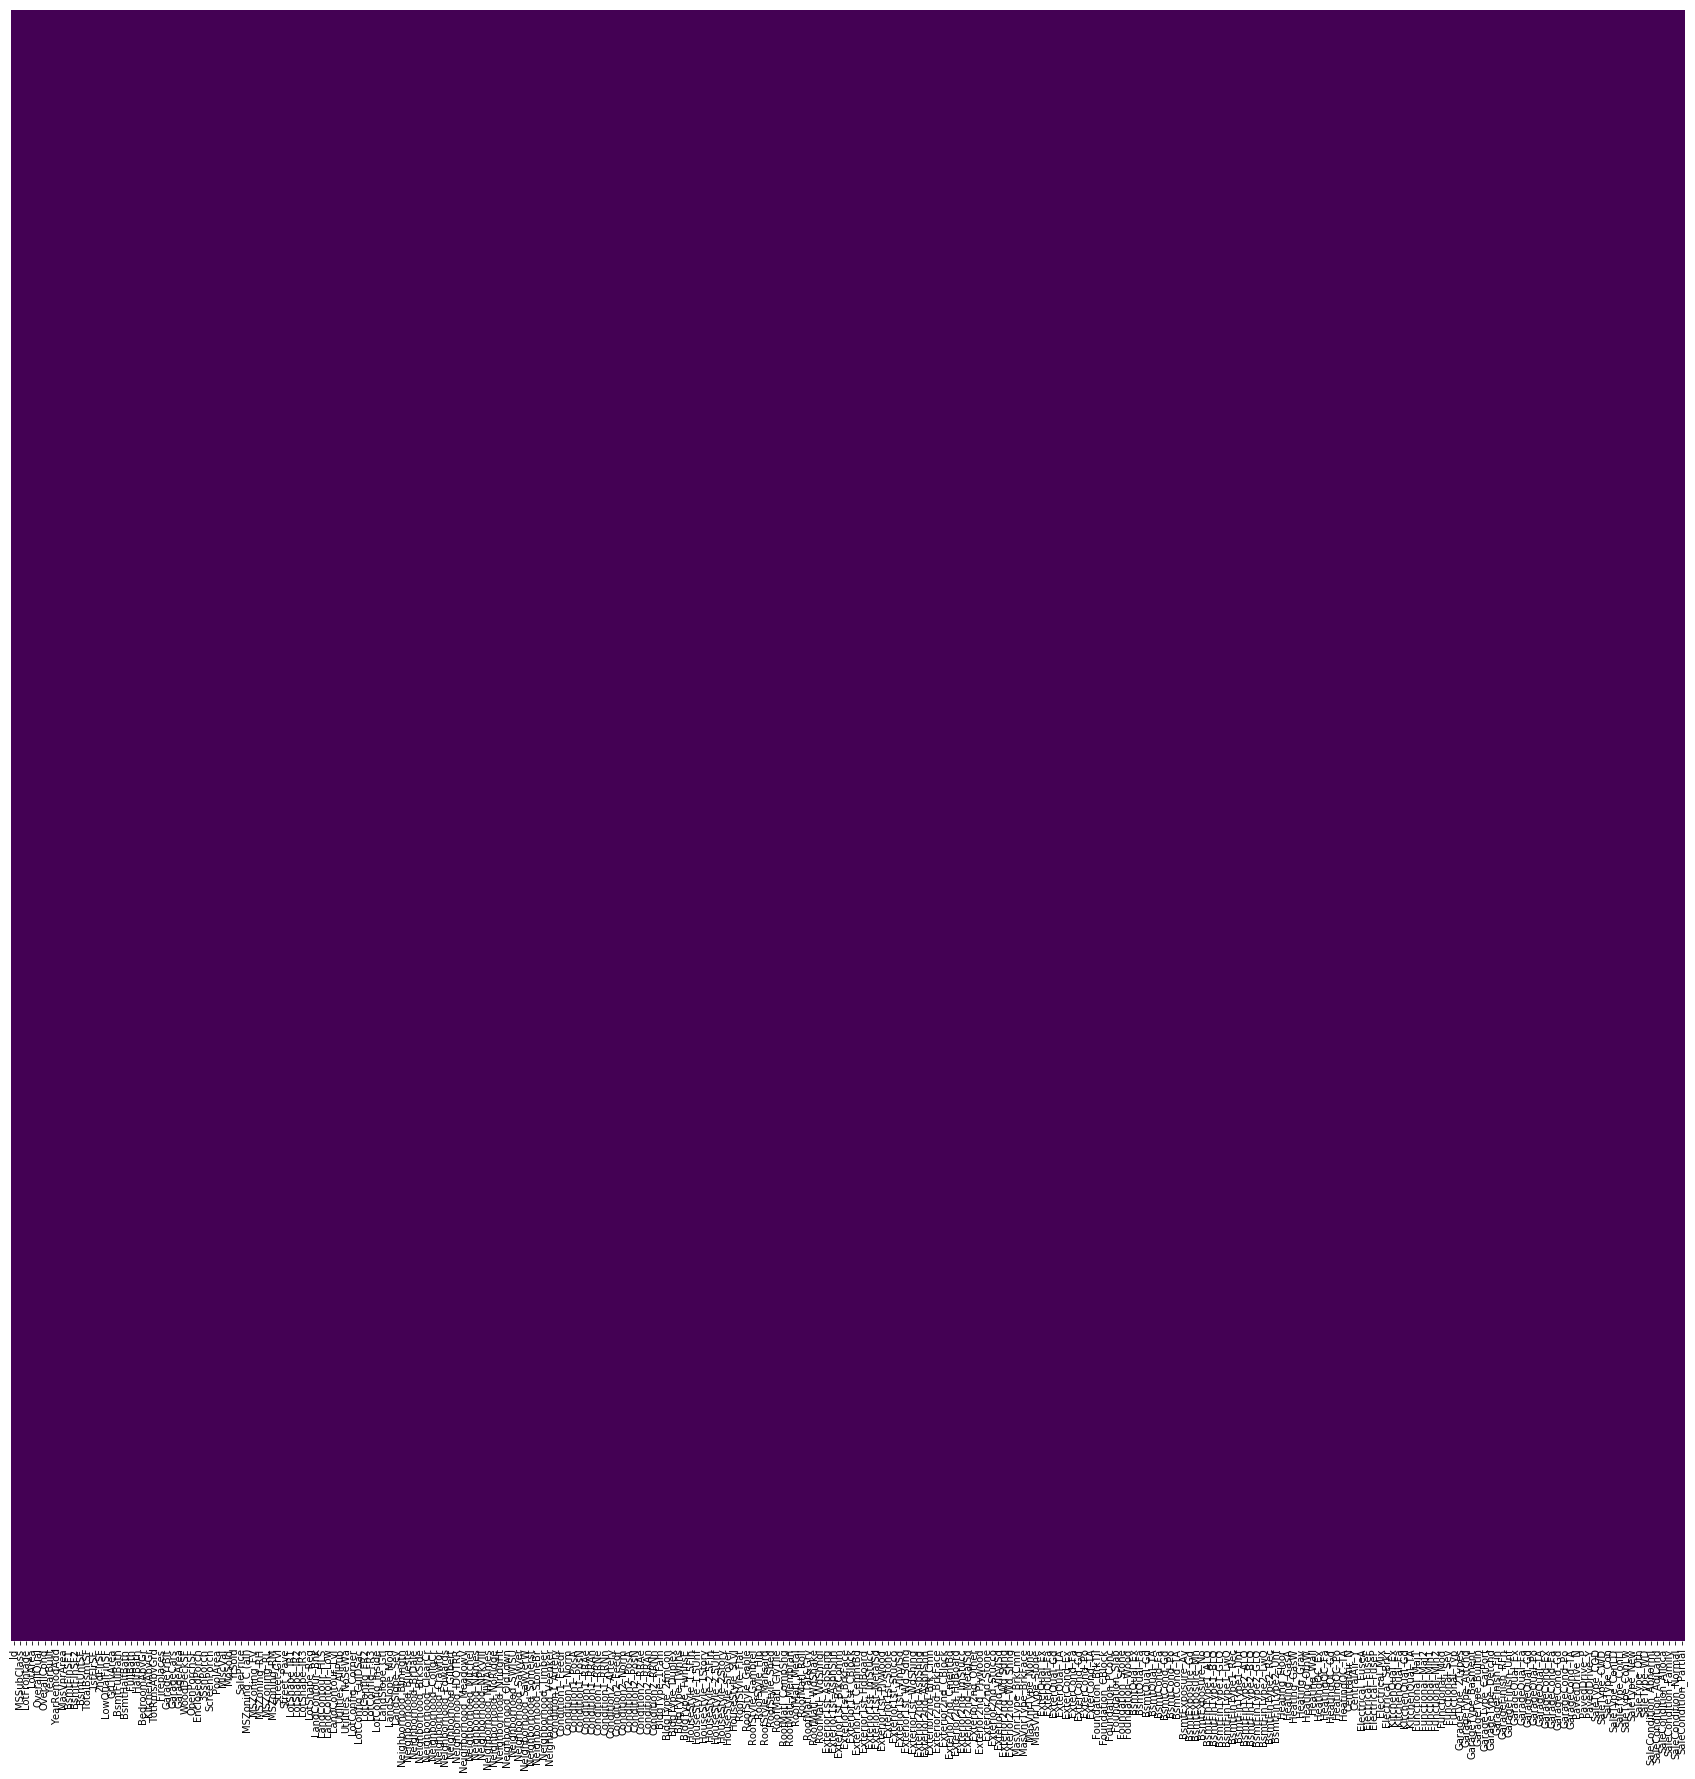

In [17]:
#confirm there are no null values in the new 1hot dataset
#this is important to build the regression model
fig = plt.figure(figsize = (30,30), clear = True)
ax = sns.heatmap(data_1hot.isnull(), xticklabels=True, yticklabels=False,
                 cbar = False, cmap = 'viridis', linecolor = 'b')
#notice there are many more attributes. This is because of the one_hot encoding


In [18]:
#separate target variable
y = data_1hot['SalePrice']
X = data_1hot.drop(['SalePrice'], axis=1)

In [19]:
#separate data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
#Build Linear Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
#fit the model
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
#predicting sales price for test data set
y_pred = regr.predict(X_test)

In [22]:
#score: perfect prediction is 1
regr.score(X_test, y_test)

0.4830926871161857

In [23]:
#a pretty bad score, so what if we:
#removed irrelevant attributes?
#dedicated more of the data to testing?
#utilized unsupervised machine learning to fill null values with the most approriate values 
#used min-max scaling to regularize parameter values for model?
#removed outliers?
#used a different supervised regression model?

In [24]:
#reshaping train and testing for visualization
X_train_viz = X_train.iloc[:,0].values.reshape(-1,1)
X_test_viz = X_test.iloc[:,0].values.reshape(-1,1)

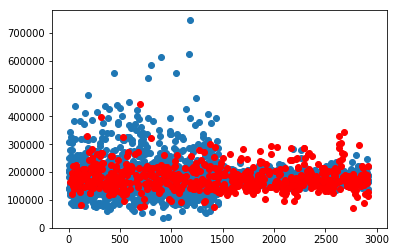

In [25]:
#try to visualize performance
plt.scatter(X_train_viz, y_train)
plt.scatter(X_test_viz, y_pred, color='r')